In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
sns.set(style="darkgrid")
import matplotlib.pyplot as plt 
import os
import warnings
warnings.filterwarnings("ignore")
from collections import Counter
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/netflix-shows/netflix_titles.csv


## Load data 

In [2]:
def load_data(path, info=True):
    if len(path.split(".csv")) >1:
        read=pd.read_csv(path)
    elif len(path.split(".xlsx")) >1: 
        read=pd.read_csv(path)
    
    if info:
        if len(read) > 0:
            print(">>> Data imported sucessfully !!") 
            print(">>> Dimentions: ")
            print("------ rows:- ",read.shape[0], "columns:- ",read.shape[1]) 
            print(">>> Missing Value:")
            print(np.where(read.isnull().values.any()==False, "------ No Missing value found !", "------ Dataset contains Missing value !"))
            print(np.where(read.isnull().values.any()==True, f"------ missing values: \n{read.isnull().sum()}"," "))
            
        else:
            print(">>> Data didnot import :( ") 
        return read

In [3]:
data = "/kaggle/input/netflix-shows/netflix_titles.csv" 
netflix_ = load_data(data) 

>>> Data imported sucessfully !!
>>> Dimentions: 
------ rows:-  8807 columns:-  12
>>> Missing Value:
------ Dataset contains Missing value !
------ missing values: 
show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64


In [4]:
netflix_.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [5]:
netflix_shows = netflix_[netflix_['type']=="TV Show"] 
netflix_movie = netflix_[netflix_['type']=="Movie"] 

## ***ANALYSIS OF MOVIES AND TV SHOWS***

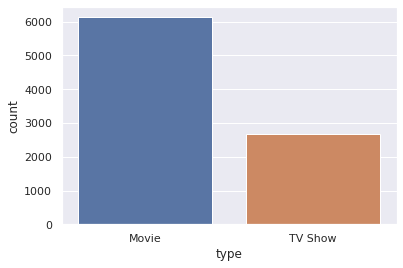

In [6]:
ax = sns.countplot(x="type", data=netflix_)

### *Month in which producer can publish movie or a show ...* 

In [7]:
def analyze_months_and_shows(data):
    netflix_date = data[['date_added']].dropna() 
    netflix_date['year'] = netflix_date['date_added'].apply(lambda x : x.split()[-1])
    netflix_date['month'] = netflix_date['date_added'].apply(lambda x: x.split()[0]) 
    month_order=['January', 'February', 'March', 'April','May','June','July','August','September','October','November','December'][::-1]
    df = netflix_date.groupby('year')['month'].value_counts().unstack().fillna(0)[month_order].T
    show_graph(df)
    return df

In [8]:
def show_graph(df):
    plt.figure(figsize=(8,7), dpi=200)
    plt.pcolor(df, cmap='afmhot_r')
    plt.xticks(np.arange(0.5, len(df.columns), 1), df.columns,fontsize=7)
    plt.yticks(np.arange(0.5, len(df.index), 1), df.index,fontsize=7)
    plt.title("Netflix content update ", fontsize=12)

    cbar=plt.colorbar()
    cbar.ax.tick_params(labelsize=8) 
    cbar.ax.minorticks_on()
    plt.show()

### ***Analyze movie release with year and month wise***

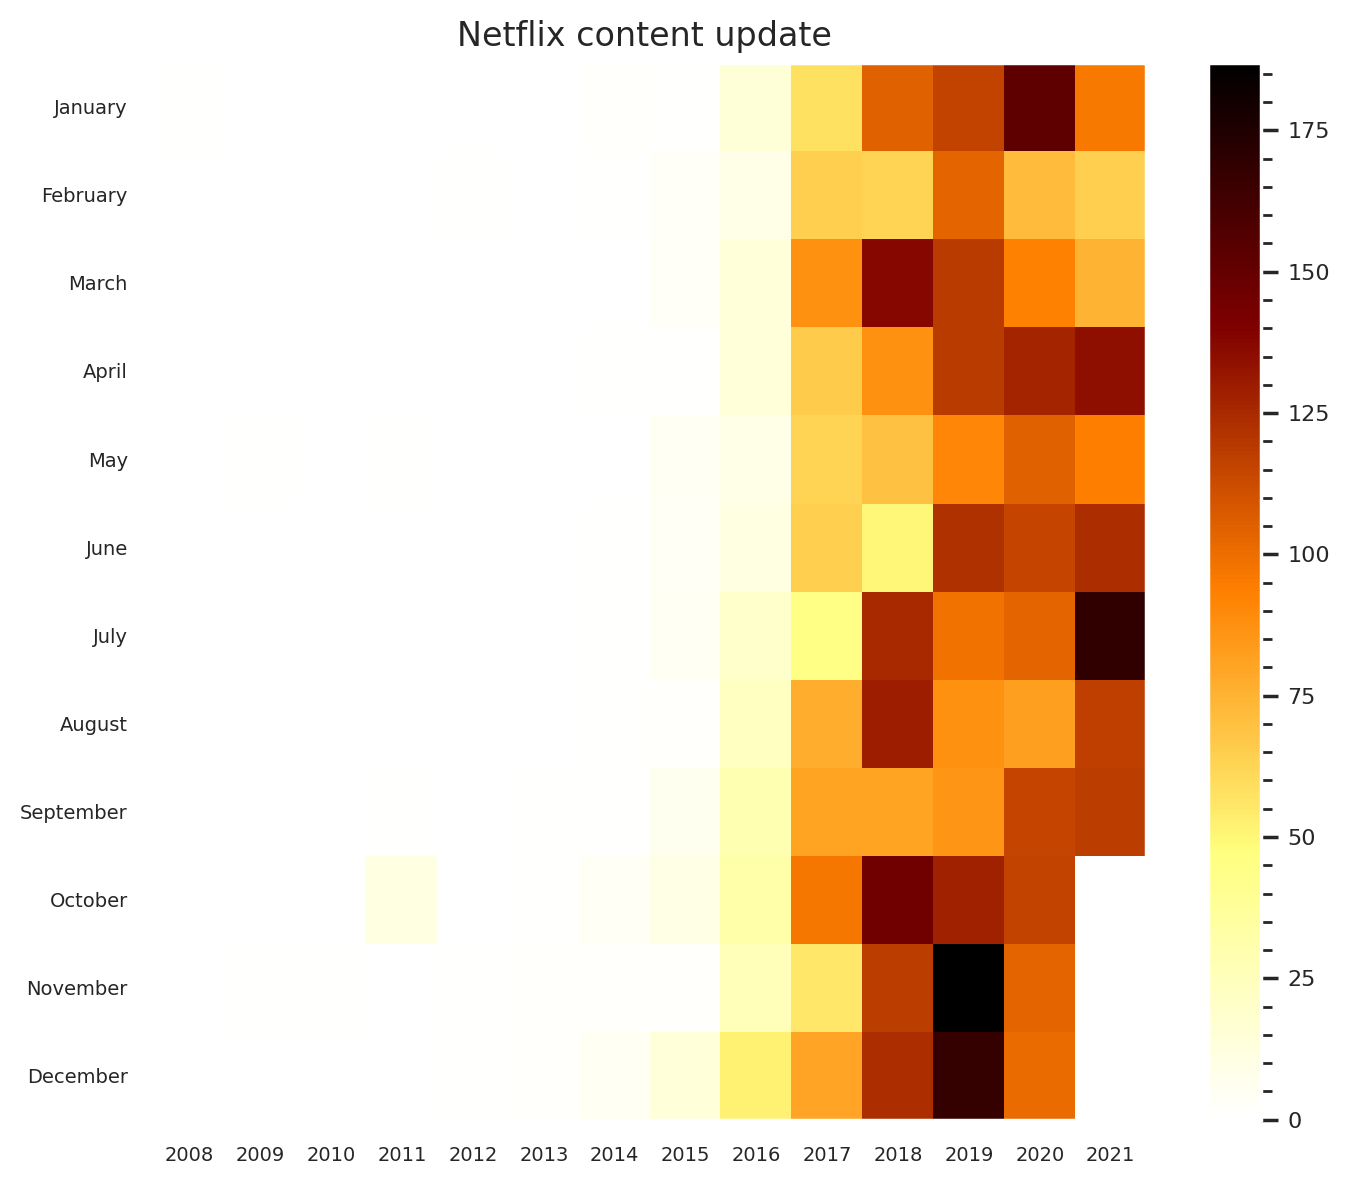

In [9]:
df=analyze_months_and_shows(netflix_movie)

> ### *in the given years we have seen in the month of Feb, May less movies was released so producer can release on this months.*

### ***Analyze tv shows release with year and month wise***


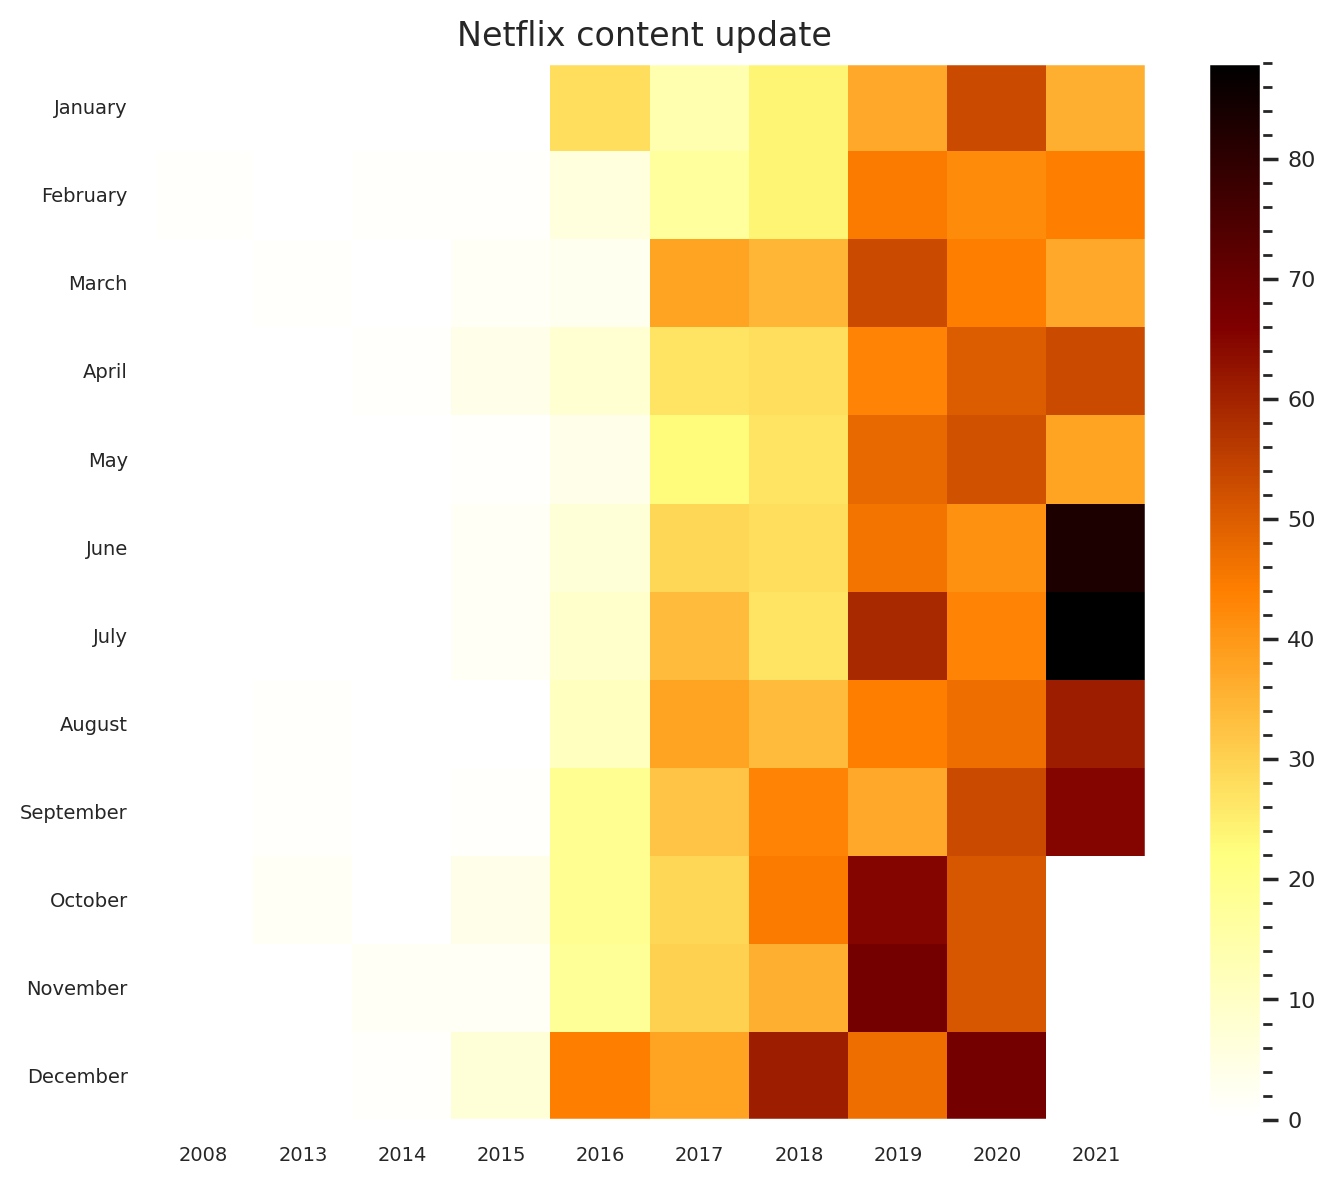

In [10]:
df=analyze_months_and_shows(netflix_shows)

> ### *in the given years we have seen in the month of Feb, March less tv shows was released so producer can release on this months*

## **Analyzing rating of movies and tv shows** 

In [11]:
def rating(df):
    plt.figure(figsize=(12,10))
    ax=sns.countplot(x='rating', data=df, order=df['rating'].value_counts().index[0:len(df['rating'].unique())])
    return ax

### ***Movie Ratings***

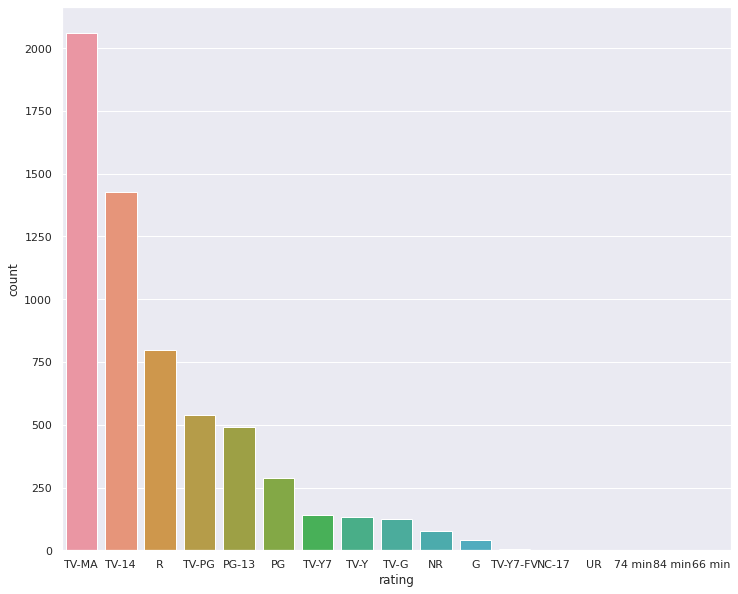

In [12]:
a=rating(netflix_movie)

> The largest count of movies are made with the 'TV-MA' rating."TV-MA" is a rating assigned by the TV Parental Guidelines to a television program that was designed for mature audiences only.

> Second largest is the 'TV-14' stands for content that may be inappropriate for children younger than 14 years of age.

> Third largest is the very popular 'R' rating.An R-rated film is a film that has been assessed as having material which may be unsuitable for children under the age of 17 by the Motion Picture Association of America; the MPAA writes "Under 17 requires accompanying parent or adult guardian.

### ***Tv Shows Ratings***

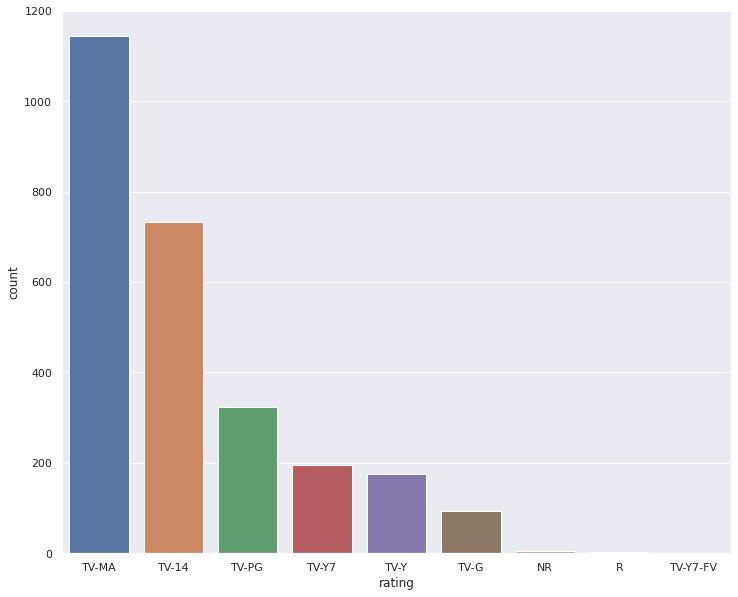

In [13]:
a=rating(netflix_shows)

> The largest count of Tv shows are made with the 'TV-MA' rating."TV-MA" is a rating assigned by the TV Parental Guidelines to a television program that was designed for mature audiences only.

> Second largest is the 'TV-14' stands for content that may be inappropriate for children younger than 14 years of age.

> Third is the 'TV-PG'– Parental Guidance Suggested This program contains material that parents may find unsuitable for younger children.



### **Year wise release analysis**

In [14]:
def release_year_yearly(df):
    plt.figure(figsize=(12,10))
    ax=sns.countplot(y='release_year', data=df, order=df['release_year'].value_counts().index[0:18])

#### ***Movies*** 

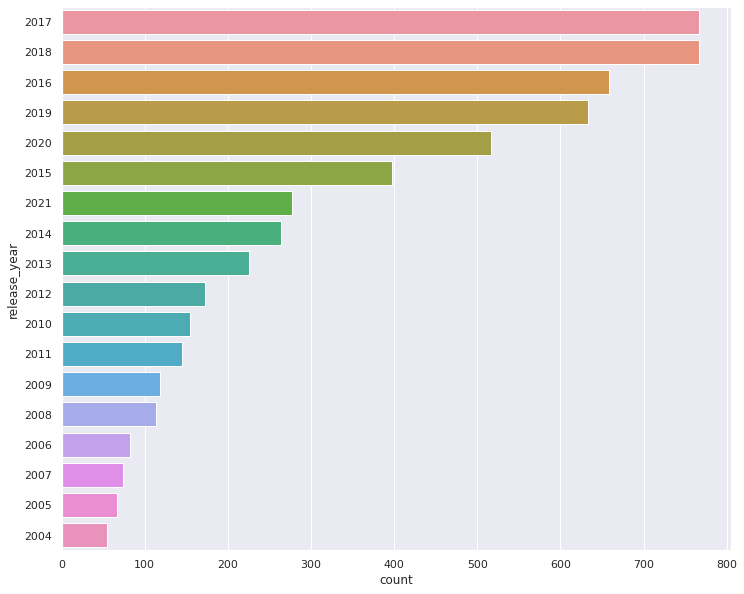

In [15]:
release_year_yearly(netflix_movie)

> ### *Highest number of movies released in Netflix was in the year 2017 and 2018*

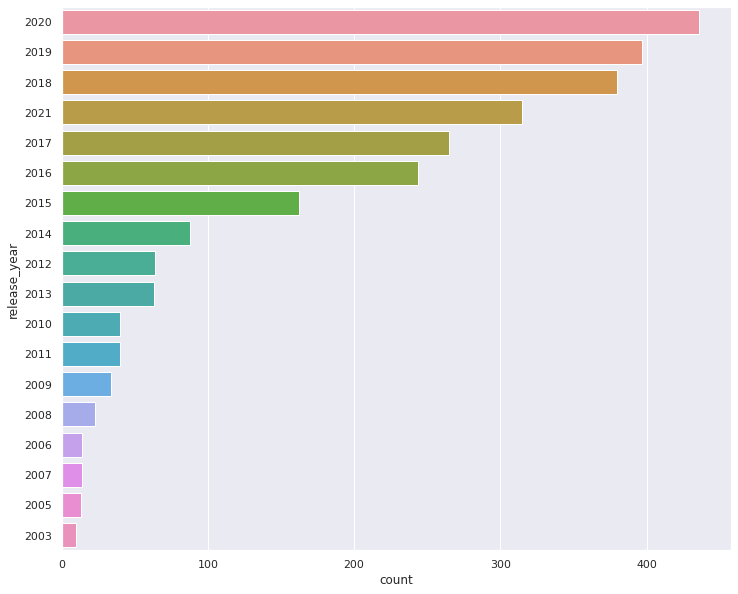

In [16]:
release_year_yearly(netflix_shows)

> ### *Highest number of Tv shows released in Netflix was in the year 2020*

### **Top 10 countries making movies & Tv shows**

In [17]:
def country_analysis(df, graph=True):
    countries={}
    country = list(df['country'].fillna('Unknown'))
    for i in country:
        i=list(i.split(','))
        if len(i)==1:
            if i in list(countries.keys()):
                print(i)
                countries[i]+=1
            else:
                countries[i[0]]=1
        else:
            for j in i:
                if j in list(countries.keys()):
                    countries[j]+=1
                else:
                    countries[j]=1
    final_countries={}

    for country, no in countries.items():
        country=country.replace(' ', '')
        if country in list(final_countries.keys()):
            final_countries[country]+=no
        else:
            final_countries[country]=no

    final_countries={k:v for k, v in sorted(final_countries.items(), key=lambda item : item[1] , reverse=True)}
    if graph==True:
        plt.figure(figsize=(12,10))
        ax=sns.barplot(x=list(final_countries.keys())[0:10], y=list(final_countries.values())[0:10])
    
    return final_countries


### *Movies*

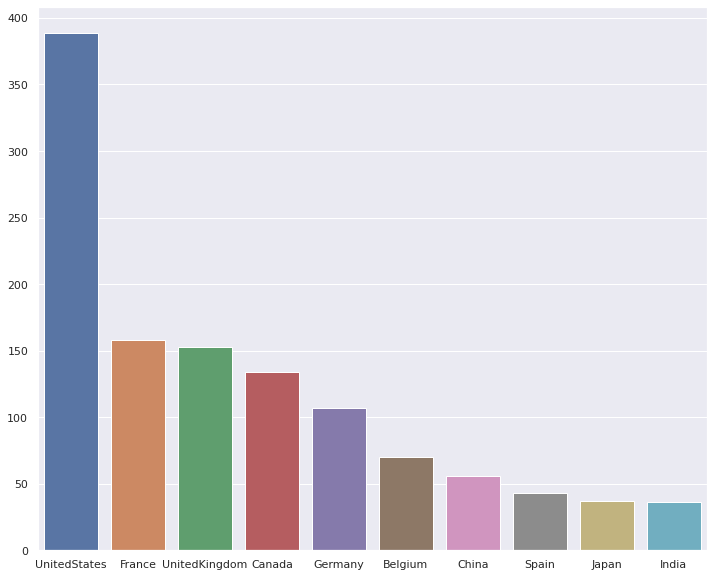

In [18]:
a = country_analysis(netflix_movie)

> ### *USA is the top country in producing most number of movies in Netflix followed by France and United kingdom .*  

### *TV Shows*

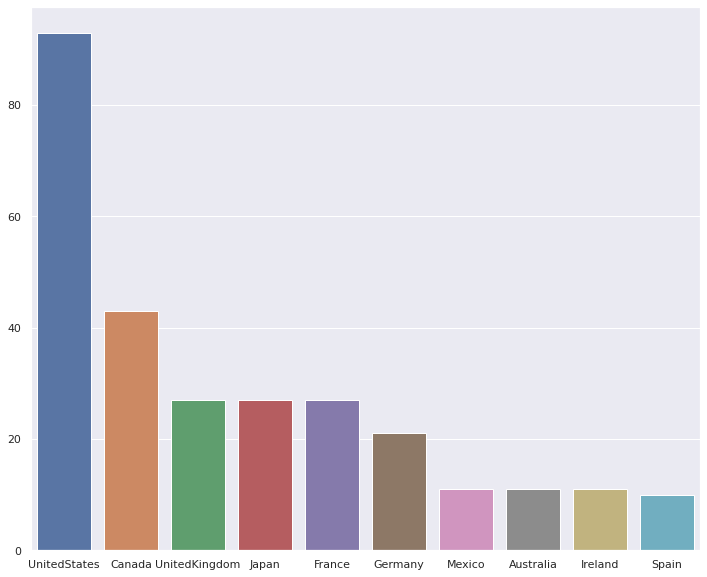

In [19]:
a = country_analysis(netflix_shows)

> ### *USA is the top country in producing most number of TV Shows in Netflix followed by Canada and United kingdom .*  

### **Analysis of duration of movies**

In [20]:
def duration_analysis_movies(df):
    a=df['duration'].str.replace(' min','')
    a=a.fillna(0)
    a=a.astype(str).astype(int)
    sns.kdeplot(data=a, shade=True)
    return a

def duration_analysis_shows(df):
    a=df['duration'].apply(lambda x: x.split(' ')[0])
    a=a.fillna(0)
    a=a.astype(str).astype(int)
    sns.kdeplot(data=a,shade=True)
    
    return a

### ***TV shows***

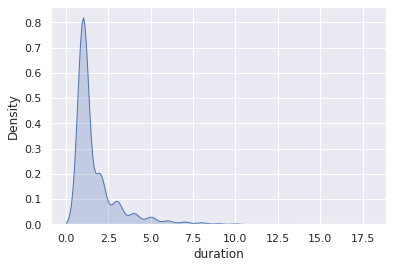

In [21]:
a=duration_analysis_shows(netflix_shows) 

> ### *Most of the Tv shows have around 1-2 seasons.*

### ***Movies***

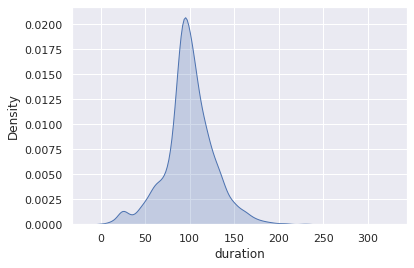

In [22]:
a=duration_analysis_movies(netflix_movie)

> ### *Most of the Movies in netflix have a duration of 75min -120 mins.. !*

### **WordCloud for Genres**

In [23]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

def generes_analysis(df):
    generes = list(df['listed_in'])
    gen=[]
    for i in generes:
        i = list(i.split(','))
        for j in i:
            gen.append(j.replace(' ',''))

    g=Counter(gen)
    text = list(set(gen))
    plt.rcParams['figure.figsize'] = (13, 13)

    wordcloud = WordCloud(max_words=1000000,background_color="white").generate(str(text))

    plt.imshow(wordcloud,interpolation="bilinear")
    plt.axis("off")
    plt.show()
    return g



### ***TV shows***

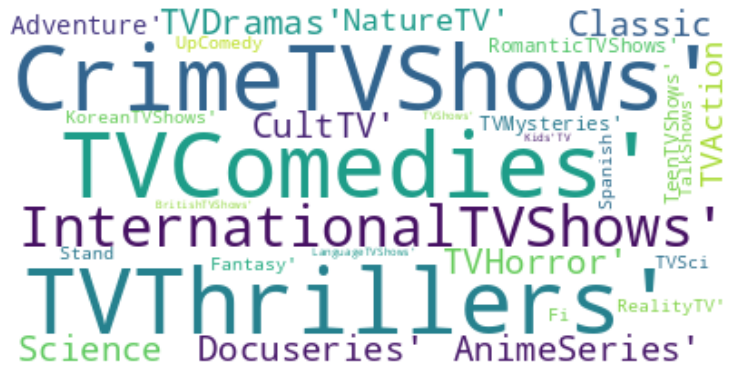

In [24]:
g=generes_analysis(netflix_shows)

### ***Movies***

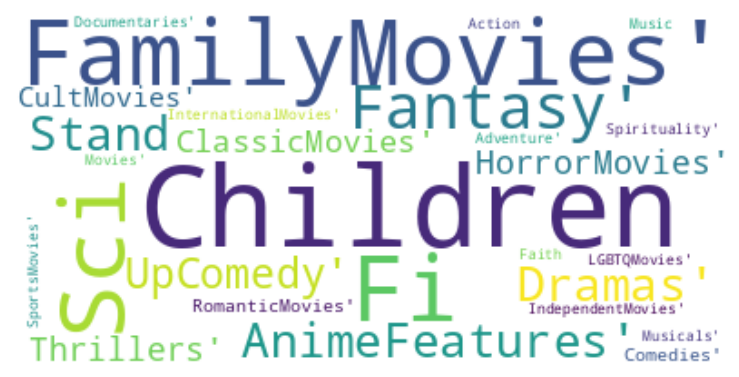

In [25]:
g=generes_analysis(netflix_movie)

## **Recommendation System (Content Based)**

> #### *The TF-IDF(Term Frequency-Inverse Document Frequency (TF-IDF) ) score is the frequency of a word occurring in a document, down-weighted by the number of documents in which it occurs. This is done to reduce the importance of words that occur frequently in plot overviews and therefore, their significance in computing the final similarity score.*



In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(stop_words='english') # removing stopwords
netflix_['description']=netflix_['description'].fillna('')
tfidf_matrix=tfidf.fit_transform(netflix_['description']) #contructing the TFIDF matrix

> *Here, The Cosine similarity score is used since it is independent of magnitude and is relatively easy and fast to calculate.*

In [27]:
from sklearn.metrics.pairwise import linear_kernel, cosine_similarity

cosine_sim = linear_kernel (tfidf_matrix, tfidf_matrix) #cosine similarity matrix

indices = pd.Series(netflix_.index, index=netflix_['title']).drop_duplicates()

In [28]:
def get_recomendations(title, cosine=cosine_sim):
    idx=indices[title]
    sim_scores = list(enumerate(cosine_sim[idx])) #pairwise similarity with the gien movie
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True) #sorting 
    sim_scores = sim_scores[1:11] # first 10 movie
    movie_indices = [i[0] for i in sim_scores] #get the similarity indices
    return netflix_['title'].iloc[movie_indices] # return the title of the similar movie
    

In [29]:
get_recomendations('Peaky Blinders')

7683                    Our Godfather
2646                   My Stupid Boss
3133                              Don
8293                         The Fear
7140    Jonathan Strange & Mr Norrell
7785                Power Rangers Zeo
8467                       The Prison
8539                       The Tudors
1510                    The Con Is On
8391     The Legend of Michael Mishra
Name: title, dtype: object

> #### *It is seen that the model performs well, but is not very accurate.Therefore, more metrics are added to the model to improve performance.*

## Content based filtering on multiple metrics 

In [30]:
data_=netflix_.fillna('')
data_.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,,,,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [31]:
# lower case the text and removing the spaces.
def clean_data(df):
    return str.lower(df.replace(' ',''))

In [32]:
#features ['title', 'director, 'cast', 'listed_in', 'description'] added to the model and removing other features.
features=['title', 'director', 'cast', 'listed_in', 'description']
data_=data_[features]
for i in features:
    data_[i]=data_[i].apply(clean_data)
data_.head()

,title,director,cast,listed_in,description
0,dickjohnsonisdead,kirstenjohnson,,documentaries,"asherfathernearstheendofhislife,filmmakerkirst..."
1,blood&water,,"amaqamata,khosingema,gailmabalane,thabangmolab...","internationaltvshows,tvdramas,tvmysteries","aftercrossingpathsataparty,acapetownteensetsou..."
2,ganglands,julienleclercq,"samibouajila,tracygotoas,samueljouy,nabihaakka...","crimetvshows,internationaltvshows,tvaction&adv...","toprotecthisfamilyfromapowerfuldruglord,skille..."
3,jailbirdsneworleans,,,"docuseries,realitytv","feuds,flirtationsandtoilettalkgodownamongthein..."
4,kotafactory,,"mayurmore,jitendrakumar,ranjanraj,alamkhan,ahs...","internationaltvshows,romantictvshows,tvcomedies",inacityofcoachingcentersknowntotrainindia’sfin...


In [33]:
def create_soup(df):
    return df['title']+' '+df['director']+' '+df['cast']+' '+df['listed_in']+' '+df['description']

In [34]:
data_['soup']=data_.apply(create_soup, axis=1)

In [35]:
count_matrix=tfidf.fit_transform(data_['soup']) # contructing TFIDF matrix 
cosine_sm2 = cosine_similarity(count_matrix, count_matrix)

In [36]:
data_ = data_.reset_index()
indices=pd.Series(data_.index, index=data_['title'])
indices

title
dickjohnsonisdead         0
blood&water               1
ganglands                 2
jailbirdsneworleans       3
kotafactory               4
                       ... 
zodiac                 8802
zombiedumb             8803
zombieland             8804
zoom                   8805
zubaan                 8806
Length: 8807, dtype: int64

In [37]:
def get_recomendations_new(title, cosine_sim=cosine_sim):
    title=title.replace(' ','').lower()
    idx=indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:11]
    movie_indices = [i[0] for i in sim_scores]
    return data_['title'].iloc[movie_indices]
    
    

In [38]:
get_recomendations_new('sanju', cosine_sm2)

4660                  pk
1114             3idiots
4825         luststories
1115    ferrarikisawaari
3032         madeinchina
821      theweddingguest
1000             wilddog
3132       dildhadaknedo
253               bombay
1944                mann
Name: title, dtype: object

In [39]:
get_recomendations_new('Peaky Blinders', cosine_sm2)

4951                                     loaded
8431                        themurderdetectives
5032                  thefrankensteinchronicles
3034                                  giri/haji
6210                                  backtrack
340                                   inception
7870                               ripperstreet
6922                                happyvalley
2807    shaunthesheep:adventuresfrommossybottom
7140                  jonathanstrange&mrnorrell
Name: title, dtype: object

> This recommendation is just based on the Plot.

